Library

In [4]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

Step 1 - Download The Dataset

In [2]:
from sklearn.datasets import fetch_lfw_people

# Store data in 'faces'
faces = fetch_lfw_people(min_faces_per_person=60)

# Check the dataset
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder' 'Junichiro Koizumi']
4
(820, 62, 47)


Step 2 - Visualize The Data

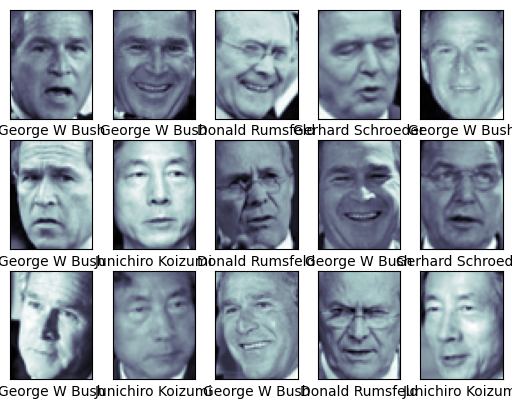

In [5]:
# We will plot some of the data

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

Step 3 - Dimensional Reduction and Model Initiation

In [6]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

# Notes that our image size is 62*47=2914
# PCA reduce its dimension to 150
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)

# Intiate the SVM model
svc = SVC(kernel='rbf', class_weight='balanced')

# Create a pipeline -> Dimensional reduction followed by model fitting
model = make_pipeline(pca, svc)

Step 4 - Split Data

In [7]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

Step 5 - Perform Grid Search

In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: total: 8min 43s
Wall time: 2min
{'svc__C': 10, 'svc__gamma': 0.0001}
0.8861788617886178


Step 6 - Evaluate The Test Set

In [9]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Step 7 - Visualize The Prediction

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

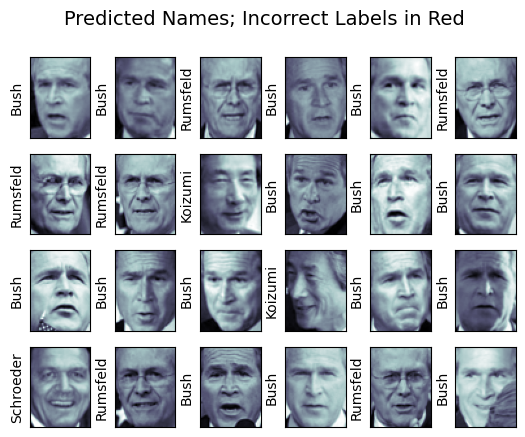

In [10]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

Step 8 - Evaluate The Model

In [11]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

  Donald Rumsfeld       0.94      0.83      0.88        36
    George W Bush       0.92      0.96      0.94       128
Gerhard Schroeder       0.84      0.96      0.90        28
Junichiro Koizumi       1.00      0.62      0.76        13

         accuracy                           0.92       205
        macro avg       0.93      0.84      0.87       205
     weighted avg       0.92      0.92      0.91       205



Text(113.92222222222219, 0.5, 'predicted label')

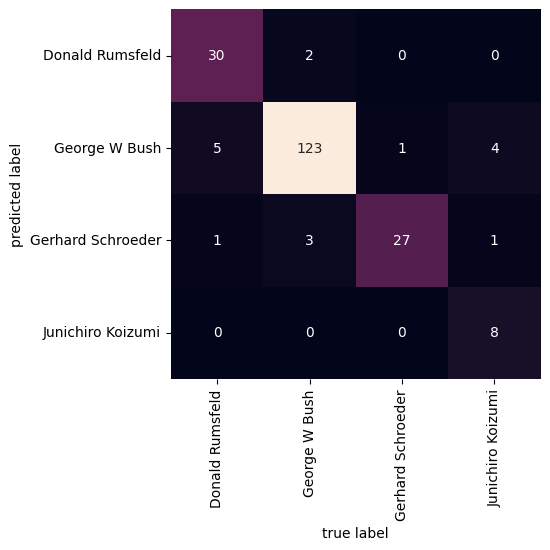

In [12]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')